# Introduction

This lab will explore the Steiner tree problem, examining heuristics as well as optimal solution methods.

First, import required packages.

In [143]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import treeopt
import numpy as np
from scipy.spatial import Delaunay

from networkx.algorithms import approximation

import gurobipy as gp
from gurobipy import GRB

# Generating a Random Graph

Next, set some parameters related to how we will construct the graph.

In [144]:
num_vertices = 25
num_terminals = 7
distance_max = 0.55
np.random.seed(41)

To ensure that the solutions to the Steiner Tree Problem are not trivial, I manually added edges and manually changed some edge weights.

In [145]:
edges_to_add = [(3,6), (22,23)] #[(1,9)]
weights_to_change = {} #{(16,10) : 7, (0,1) : 6, (9,10) : 7, (1,9) : 12}

Next, we randomly generate points and use the Delaunay triangulation to ensure that the graph is *planar* (i.e., the edges to not cross over each other).

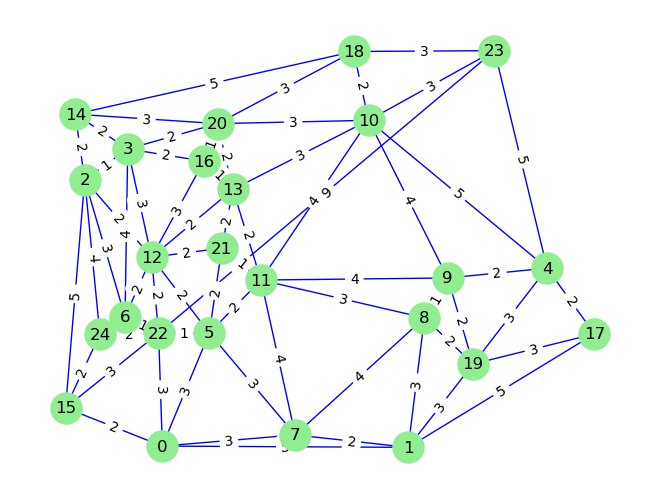

In [146]:
points = np.random.rand(num_vertices, 2)

# Compute the Delaunay triangulation of these points
tri = Delaunay(points)

G = nx.Graph()
G.add_nodes_from(range(num_vertices))

for i in range(num_vertices):
    G.nodes[i]['pos'] = points[i]

# For every triangle (simplex), add edges between its vertices
for simplex in tri.simplices:
    for i in range(len(simplex)):
        for j in range(i + 1, len(simplex)):
            u, v = simplex[i], simplex[j]
            distance = 1 + 10*np.linalg.norm(points[u] - points[v])
            G.add_edge(u, v, weight=int(distance))


# Remove some edges that have a distance longer than distance_max
for edge in list(G.edges()):
    distance = np.linalg.norm(points[edge[0]] - points[edge[1]])
    if distance > distance_max:
        G.remove_edge(*edge)

for (i,j) in edges_to_add:
    distance = 1 + 10*np.linalg.norm(points[i] - points[j])
    G.add_edge(i,j, weight=int(distance))

for edge in weights_to_change:
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['weight'] = weights_to_change[edge]
        
pos = {i: G.nodes[i]['pos'] for i in G.nodes()}

nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=500)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

This code writes this graph as a LaTeX ``tikzpicture``.

In [147]:
treeopt.graph_to_latex(G, scale = 10, edge_labels = edge_labels, tikz_file_name = "graph15.tex")

# Minimum Steiner Tree Problem

Next we will turn to the Minimum Steiner Tree Problem. The following code randomly selects some of the vertices to be terminals. Thus, the remaining vertices are *Steiner vertices*.

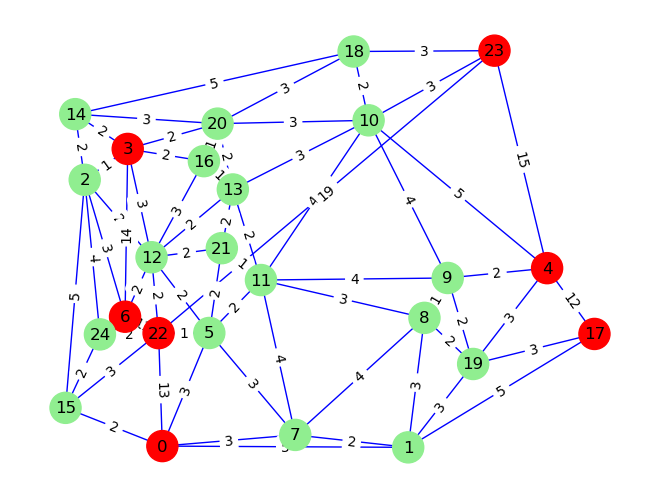

In [148]:
# sample a set of 5 terminal vertices
terminals = np.random.choice(num_vertices, size=num_terminals, replace=False)

for i in range(num_terminals):
    for j in range(i + 1, num_terminals):
        t1 = terminals[i]
        t2 = terminals[j]
        if G.has_edge(t1, t2):
            G[t1][t2]['weight'] += 10

# Set the color of terminal vertices to a different color
node_colors = ['lightgreen' if i not in terminals else 'red' for i in range(num_vertices)]

# Draw the graph with terminal vertices labeled in red
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='blue', node_size=500)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

Again, we export the graph to LaTeX.

In [149]:
def get_node_style(i):
    if i in terminals:
        return "terminal_style"
    else:
        return "node_style"

node_opts = {i: get_node_style(i) for i in G.nodes()}
treeopt.graph_to_latex(G, scale = 10, edge_labels = edge_labels, node_opts = node_opts, 
                       tikz_file_name = "terminals15.tex")

# Problems

The following problems relate to finding a Steiner tree solution for the randomly generated graph above (with the randomly selected terminals).

## Problem 1
Do the following

a. Write code that finds the minimum spanning tree on the terminal subgraph (the subgraph of G induced by only the terminal vertices).

b. Compare the solution computed by your algorithm with the optimal solution (you may use Gurobi to find the optimal solution).

## Problem 2
Do the following

a. Implement the algorithm of Kuo et al (i.e., finding the MST for the metric closure).

b. Compare the olution computed by your algorithm with the optimal solution (you may use Gurobi to find the optimal solution).

## Problem 3
Do the following

a. Implement the shortest path addition heuristic discussed in class.

b. Compare the solution computed by your algorithm with the optimal solution (you may use Gurobi to find the optimal solution).